# Uvod u analizu podataka: 2. domaća zadaća

In [405]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Promatram stvarne podatke iz 2008. i 2009. godine jednog hotela u Rijeci.

In [406]:
import pandas as pd
dataset_path = './train.parquet'
df = pd.read_parquet(dataset_path)
df.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
0,73710,1.0,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4255.462,425.517,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0
1,73710,2.0,2007-12-14,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4243.709,424.349,450.921,4552.937,265.428,26.572,43.800,0.000,3,10.0
2,74464,1.0,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,4336.857,433.693,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0
3,74461,1.0,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0
4,74466,1.0,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0


In [407]:
df['reservation_status'].unique()

array(['Checked-out', 'Cancelled', 'No-show'], dtype=object)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  object        
 7   date_from           31634 non-null  object        
 8   date_to             31634 non-null  object        
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   object        
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

## Čišćenje podataka

Brisanje podataka kojima je datum dolaska prije datuma kreiranja rezervacija

In [409]:
df = df[df["date_from"] >= df["reservation_date"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31147 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31147 non-null  int64         
 1   night_number        31147 non-null  float64       
 2   stay_date           31147 non-null  datetime64[ns]
 3   guest_id            31147 non-null  int64         
 4   guest_country_id    31147 non-null  object        
 5   reservation_status  31147 non-null  object        
 6   reservation_date    31147 non-null  object        
 7   date_from           31147 non-null  object        
 8   date_to             31147 non-null  object        
 9   resort_id           31147 non-null  int64         
 10  cancel_date         6040 non-null   object        
 11  room_cnt            31147 non-null  int64         
 12  adult_cnt           31147 non-null  int64         
 13  children_cnt        31147 non-null  int64         


Brisanje podataka gdje je broj odraslih 0

In [410]:
df = df[df["adult_cnt"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31147 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31147 non-null  int64         
 1   night_number        31147 non-null  float64       
 2   stay_date           31147 non-null  datetime64[ns]
 3   guest_id            31147 non-null  int64         
 4   guest_country_id    31147 non-null  object        
 5   reservation_status  31147 non-null  object        
 6   reservation_date    31147 non-null  object        
 7   date_from           31147 non-null  object        
 8   date_to             31147 non-null  object        
 9   resort_id           31147 non-null  int64         
 10  cancel_date         6040 non-null   object        
 11  room_cnt            31147 non-null  int64         
 12  adult_cnt           31147 non-null  int64         
 13  children_cnt        31147 non-null  int64         


Brisanje onih kojima je datum otkazivanja nakon datuma odjave

In [411]:
df = df[ (df["cancel_date"] < df["date_to"]) | (df["cancel_date"].isna())  ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31040 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31040 non-null  int64         
 1   night_number        31040 non-null  float64       
 2   stay_date           31040 non-null  datetime64[ns]
 3   guest_id            31040 non-null  int64         
 4   guest_country_id    31040 non-null  object        
 5   reservation_status  31040 non-null  object        
 6   reservation_date    31040 non-null  object        
 7   date_from           31040 non-null  object        
 8   date_to             31040 non-null  object        
 9   resort_id           31040 non-null  int64         
 10  cancel_date         5933 non-null   object        
 11  room_cnt            31040 non-null  int64         
 12  adult_cnt           31040 non-null  int64         
 13  children_cnt        31040 non-null  int64         


Brisanje ponovljenih podataka

In [412]:
df.drop_duplicates(subset = "reservation_id", inplace = True, keep = "first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14824 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      14824 non-null  int64         
 1   night_number        14824 non-null  float64       
 2   stay_date           14824 non-null  datetime64[ns]
 3   guest_id            14824 non-null  int64         
 4   guest_country_id    14824 non-null  object        
 5   reservation_status  14824 non-null  object        
 6   reservation_date    14824 non-null  object        
 7   date_from           14824 non-null  object        
 8   date_to             14824 non-null  object        
 9   resort_id           14824 non-null  int64         
 10  cancel_date         2764 non-null   object        
 11  room_cnt            14824 non-null  int64         
 12  adult_cnt           14824 non-null  int64         
 13  children_cnt        14824 non-null  int64         


Brisanje podataka gdje nije unesen total_price 

In [413]:
df = df.dropna(subset=['total_price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13012 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      13012 non-null  int64         
 1   night_number        13012 non-null  float64       
 2   stay_date           13012 non-null  datetime64[ns]
 3   guest_id            13012 non-null  int64         
 4   guest_country_id    13012 non-null  object        
 5   reservation_status  13012 non-null  object        
 6   reservation_date    13012 non-null  object        
 7   date_from           13012 non-null  object        
 8   date_to             13012 non-null  object        
 9   resort_id           13012 non-null  int64         
 10  cancel_date         952 non-null    object        
 11  room_cnt            13012 non-null  int64         
 12  adult_cnt           13012 non-null  int64         
 13  children_cnt        13012 non-null  int64         


Podatke gdje postoji total price, ali je food_price ili neka od ostalih kategorija cijena jednaka null ćemo zamijeniti sa vrijednosti 0.

In [414]:
df['price'] = df['price'].fillna(0)
df['other_price'] = df['other_price'].fillna(0)
df['food_price'] = df['food_price'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13012 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      13012 non-null  int64         
 1   night_number        13012 non-null  float64       
 2   stay_date           13012 non-null  datetime64[ns]
 3   guest_id            13012 non-null  int64         
 4   guest_country_id    13012 non-null  object        
 5   reservation_status  13012 non-null  object        
 6   reservation_date    13012 non-null  object        
 7   date_from           13012 non-null  object        
 8   date_to             13012 non-null  object        
 9   resort_id           13012 non-null  int64         
 10  cancel_date         952 non-null    object        
 11  room_cnt            13012 non-null  int64         
 12  adult_cnt           13012 non-null  int64         
 13  children_cnt        13012 non-null  int64         


## Regresija

Promatrat ćemo varijablu food_price u odnosu na varijable price(=cijena jednog noćenja * broj noćenja) i other_price i probati predvidjeti koliko će gosti potrošiti na hranu u smještaju s obzirom na to koliko su potrošili na cijenu sobe i ostale dodatke.

Prvo promatramo podatke grafički

Text(0, 0.5, 'Food Price')

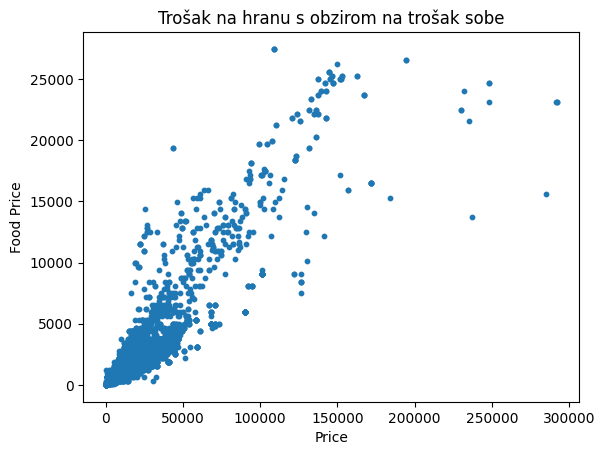

In [416]:
plt.scatter(df['price'], df['food_price'], s=10)
plt.title('Trošak na hranu s obzirom na trošak sobe')
plt.xlabel('Price')
plt.ylabel('Food Price')

In [ ]:
Skaliram podatke, rezulate linearne regresije promatrat cu i za skalirane i za početne podatke

In [417]:
from sklearn.preprocessing import StandardScaler
['price','other_price', 'food_price']
scaler = StandardScaler()
df_scaled=df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
0,73710,1.0,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,-0.316167,425.517,452.089,4564.690,-0.333407,26.572,-0.309052,0.000,3,10.0
2,74464,1.0,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,-0.311989,433.693,3806.147,19764.823,-0.233927,53.071,2.114100,3319.383,4,4.0
3,74461,1.0,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,-0.096386,853.662,1012.948,10392.280,0.163911,159.286,-0.273324,0.000,5,3.0
6,74470,1.0,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,-0.096386,853.662,1012.948,10392.280,0.163911,159.286,-0.273324,0.000,4,3.0
7,74460,1.0,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,-0.096386,853.662,1012.948,10392.280,0.163911,159.286,-0.273324,0.000,5,3.0


Text(0, 0.5, 'Food Price')

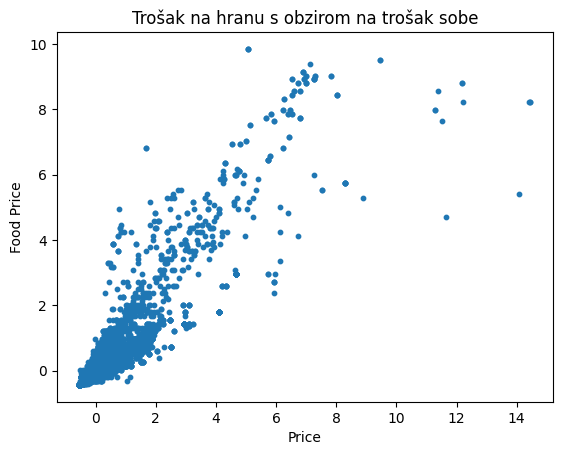

In [418]:
plt.scatter(df_scaled['price'], df_scaled['food_price'], s=10)
plt.title('Trošak na hranu s obzirom na trošak sobe')
plt.xlabel('Price')
plt.ylabel('Food Price')

Promatramo food_price s obzirom na other_price

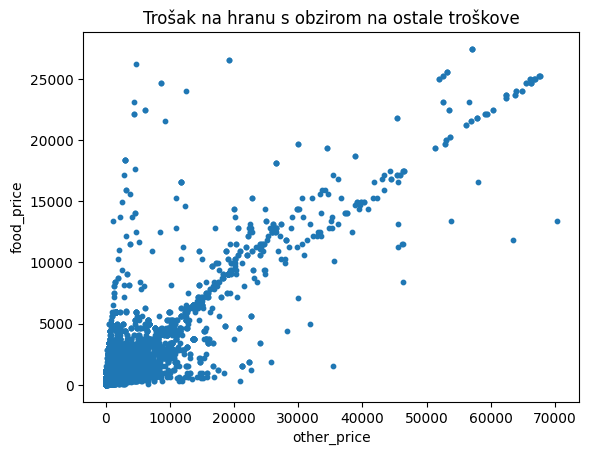

In [419]:
plt.scatter(df['other_price'], df['food_price'], s=10)
plt.title('Trošak na hranu s obzirom na ostale troškove')
plt.xlabel('other_price')
plt.ylabel('food_price')
plt.show()

### Linearna regresija

In [420]:
from sklearn.model_selection import train_test_split
X = df[['price']]
y = df['food_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [421]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [422]:
print(lr.intercept_)
print(lr.coef_)

-137.39856700606902
[0.12366823]


In [423]:
predicted_price = lr.predict([[5000], [50000]])
print(predicted_price)

[ 480.9426001  6046.01310406]


Text(0, 0.5, 'Cijena')

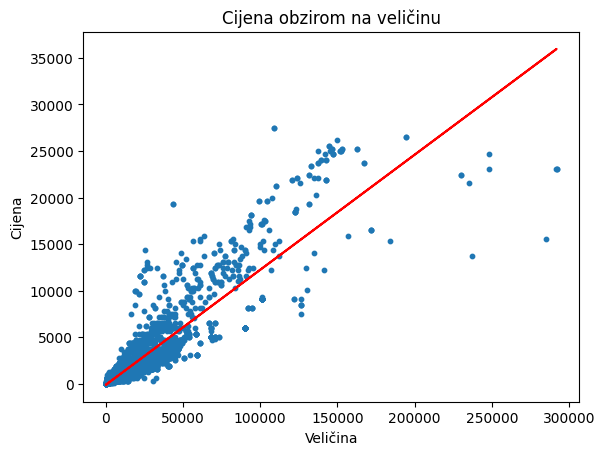

In [424]:
plt.scatter(X_train['price'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['price'], y_pred, color='r')

plt.title('Cijena obzirom na veličinu')
plt.xlabel('Veličina')
plt.ylabel('Cijena')

Validiramo model

In [425]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

1128.8073350012658
0.8222253977711376


In [426]:
y_pred_test = lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

1044.3090170595708
0.8429396513378085


RMSE ukazuje da je greška značajna ako promatramo manje cijene. Kako je r2 oko 80%, mogu zaključiti da model dobro objašnjava varijabilnost u podatcima

In [427]:
from sklearn.model_selection import train_test_split
X = df_scaled[['other_price']]
y = df_scaled['food_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [428]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [429]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

0.0035119987375863194
[0.88056714]


Text(0, 0.5, 'Cijena')

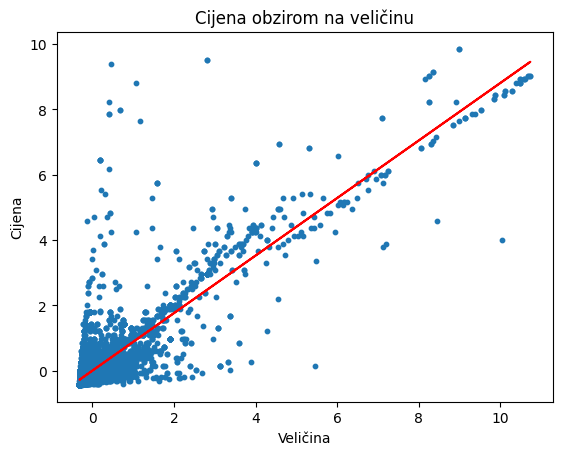

In [430]:
plt.scatter(X_train['other_price'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['other_price'], y_pred, color='r')

plt.title('Cijena obzirom na veličinu')
plt.xlabel('Veličina')
plt.ylabel('Cijena')

Evaluiramo model

In [431]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

0.49470409484477224
0.7567897668668833


In [432]:
y_pred_test = lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

0.47928771989880903
0.7643530252049748


### Linearna regresija za cijenu hrane u odnosu na ostale izdatke

In [433]:
X = df[['other_price']]
y = df['food_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [434]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [435]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

421.52040754068094
[0.38340028]


Text(0, 0.5, 'food_price')

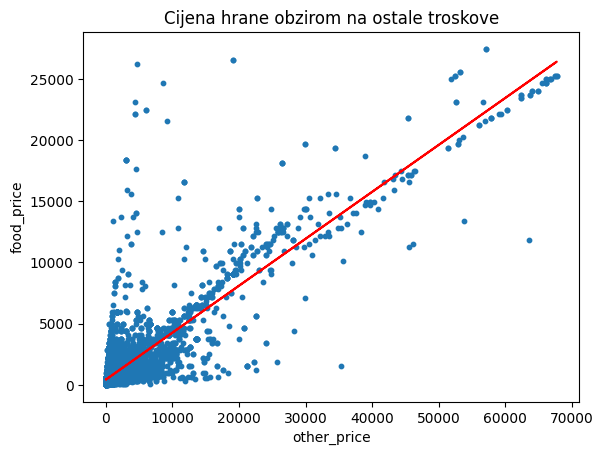

In [436]:
plt.scatter(X_train['other_price'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['other_price'], y_pred, color='r')

plt.title('Cijena hrane obzirom na ostale troskove')
plt.xlabel('other_price')
plt.ylabel('food_price')

In [437]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

1320.3099221801895
0.7567897668668833


In [438]:
y_pred_test = lr.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

1279.1653409703006
0.7643530252049748


In [ ]:
Mogu zakljuciti da je relativna greška ovog modela nešto veće od prijašnjeg te je koeficjent determinacije nešto manji.

## Polinomijalna regresija

Kako iz grafa ovisnosti price i food price vidimo da veza nije potpuno linearna možemo probati primjeniti polinomijalnu regresiju na tu varijablu.

In [439]:
from sklearn.model_selection import train_test_split
X = df[['price']]
y = df['food_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [440]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_transformed = poly_features.fit_transform(X_train)
print(X_train_transformed[0])

[1.0000000e+00 9.6910000e+02 9.3915481e+05]


In [441]:
X_train

,price
28608,969.100
31507,611.820
10247,8024.160
12373,17358.232
3265,4401.900
...,...
11451,5078.245
7783,68445.749
23286,1223.640
25771,7199.260


In [442]:
pr = LinearRegression()
pr.fit(X_train_transformed, y_train)
print(pr.intercept_)
print(pr.coef_)

-219.35947522236847
[ 0.00000000e+00  1.36183945e-01 -1.00003622e-07]


In [443]:
num_transformed = poly_features.transform([[5000]])
predicted_price = pr.predict(num_transformed)
print(predicted_price)

[459.06015812]


In [444]:
num_transformed

array([[1.0e+00, 5.0e+03, 2.5e+07]])

Text(0, 0.5, 'food_price')

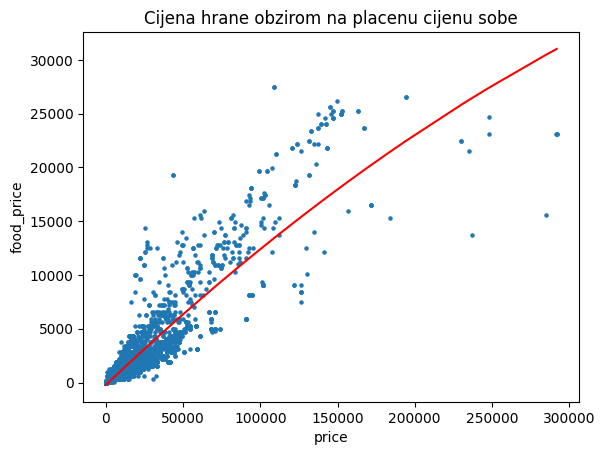

In [445]:
plt.scatter(X_train['price'], y_train, s=5)
y_pred = pr.predict(X_train_transformed)
sorted_zip = sorted(zip(X_train['price'], y_pred))
X_train_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X_train_sorted, y_pred_sorted, color='r')
plt.title('Cijena hrane obzirom na placenu cijenu sobe')
plt.xlabel('price')
plt.ylabel('food_price')

In [446]:
RMSE = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)
print(RMSE)
print(r2)

1117.9638208438025
0.8256244587866322


In [447]:
X_test_transformed = poly_features.transform(X_test)
y_pred_test = pr.predict(X_test_transformed)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

1052.984278970472
0.8403193558725351


RMSE i r2 nisu značajno manji(veči) u odnosu na linearnu regresiju, tj. polinomijalni model nije dao znatno bolju predikciju od linearnog

## Random forest

Pokušat ćemo predvidjeti hoće li rezervacija biti otkazana koristeći random forest algoritam

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13012 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      13012 non-null  int64         
 1   night_number        13012 non-null  float64       
 2   stay_date           13012 non-null  datetime64[ns]
 3   guest_id            13012 non-null  int64         
 4   guest_country_id    13012 non-null  object        
 5   reservation_status  13012 non-null  object        
 6   reservation_date    13012 non-null  object        
 7   date_from           13012 non-null  object        
 8   date_to             13012 non-null  object        
 9   resort_id           13012 non-null  int64         
 10  cancel_date         952 non-null    object        
 11  room_cnt            13012 non-null  int64         
 12  adult_cnt           13012 non-null  int64         
 13  children_cnt        13012 non-null  int64         


In [449]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['reservation_status'] = label_encoder.fit_transform(df['reservation_status'])
df['guest_country_id'] = label_encoder.fit_transform(df['guest_country_id'])
df.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
0,73710,1.0,2007-12-13,22897,22,1,2007-11-28,2007-12-13,2007-12-15,1,...,4255.462,425.517,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0
2,74464,1.0,2008-01-01,106278,22,1,2007-12-29,2008-01-01,2008-01-02,1,...,4336.857,433.693,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0
3,74461,1.0,2008-01-01,38936,19,0,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0
6,74470,1.0,2008-01-01,38936,19,1,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0
7,74460,1.0,2008-01-01,38936,19,1,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0


In [450]:
df['reservation_status'].unique()

array([1, 0, 2])

Checked-out = 1
Cancelled = 0
No-show = 2

In [451]:
from sklearn.model_selection import train_test_split
features = ['night_number', 'guest_country_id', 'room_cnt', 'adult_cnt', 'price', 'other_price', 'food_price', 'sales_channel_id']
X = df[features]
y = df['reservation_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [452]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [453]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [454]:
y_pred = model.predict(X_test)

In [455]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9323857087975413
Confusion Matrix:
 [[  44  123    0]
 [  44 2383    3]
 [   0    6    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.26      0.35       167
           1       0.95      0.98      0.96      2430
           2       0.00      0.00      0.00         6

    accuracy                           0.93      2603
   macro avg       0.48      0.41      0.44      2603
weighted avg       0.92      0.93      0.92      2603



In [456]:

new_data = pd.DataFrame({
    'night_number': [3],
    'guest_country_id': [2],
    'room_cnt': [1],
    'adult_cnt': [2],
    'price': [150.0],
    'food_price': [20.0],
    'other_price': [10.0],
    'sales_channel_id': [2]
})

prediction = model.predict(new_data)
print("Predicted Reservation Status:", prediction[0])

Predicted Reservation Status: 1


## Klasteriranje

Kako bih mogla primjeniti algoritam klasteriranja učitat ću novi dataset pogodan za nenadgledano učenje. Dataset je preuzet sa https://www.kaggle.com/datasets/arjunbhasin2013/ccdata 

In [457]:
dataset_path = './CC GENERAL.csv'
df = pd.read_csv(dataset_path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Brišem retke u kojima nedostaju vrijednosti

In [459]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

Uzimamo u obzir varijable PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY za analizu kupovnih navika potrošača.

In [460]:
X = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
          'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

Koristimo metodu lakta da odredemi broj potrebnih klastera

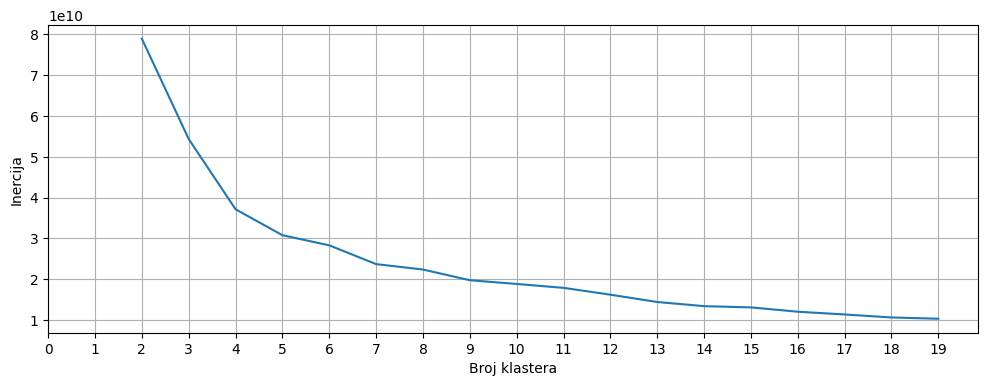

In [466]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

inercija = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inercija.append(kmeans.inertia_)

plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(range(2, 20), inercija)
plt.xticks(range(0, 20))
plt.xlabel('Broj klastera')
plt.ylabel('Inercija')
plt.show()

Iz grafa vidimo da bi optimalan broj klastera trebao biti 4

In [467]:
kmeans = KMeans(random_state=0, n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[2.46398984e+03 5.93017315e+03 3.99495178e+03 1.93647669e+03
  9.10983151e-01 7.02998499e-01 6.93224470e-01]
 [5.69051263e+03 7.74513404e+02 4.32371011e+02 3.42201275e+02
  3.97291631e-01 1.90539302e-01 2.87353723e-01]
 [5.60164463e+03 2.83941623e+04 2.28584573e+04 5.53570500e+03
  9.00757545e-01 8.43181864e-01 6.95454500e-01]
 [8.56457813e+02 6.15582487e+02 3.10926272e+02 3.04939359e+02
  4.80020181e-01 1.69480528e-01 3.56999177e-01]]


In [468]:
kmeans.cluster_centers_[:,0]

array([2463.98983907, 5690.51263318, 5601.64463086,  856.45781338])

In [470]:
print(X.loc[[0]])
print(kmeans.predict(X.loc[[0]]))

     BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  40.900749       95.4               0.0                    95.4   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.166667                         0.0   

   PURCHASES_INSTALLMENTS_FREQUENCY  
0                          0.083333  
[3]


In [475]:
print(kmeans.predict([[-2, 10, 6, 4,1,8,10]]))

[3]


In [473]:
X['Cluster'] = kmeans.labels_
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,Cluster
0,40.900749,95.40,0.00,95.40,0.166667,0.000000,0.083333,3
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,0.000000,3
2,2495.148862,773.17,773.17,0.00,1.000000,1.000000,0.000000,3
4,817.714335,16.00,16.00,0.00,0.083333,0.083333,0.000000,3
5,1809.828751,1333.28,0.00,1333.28,0.666667,0.000000,0.583333,3


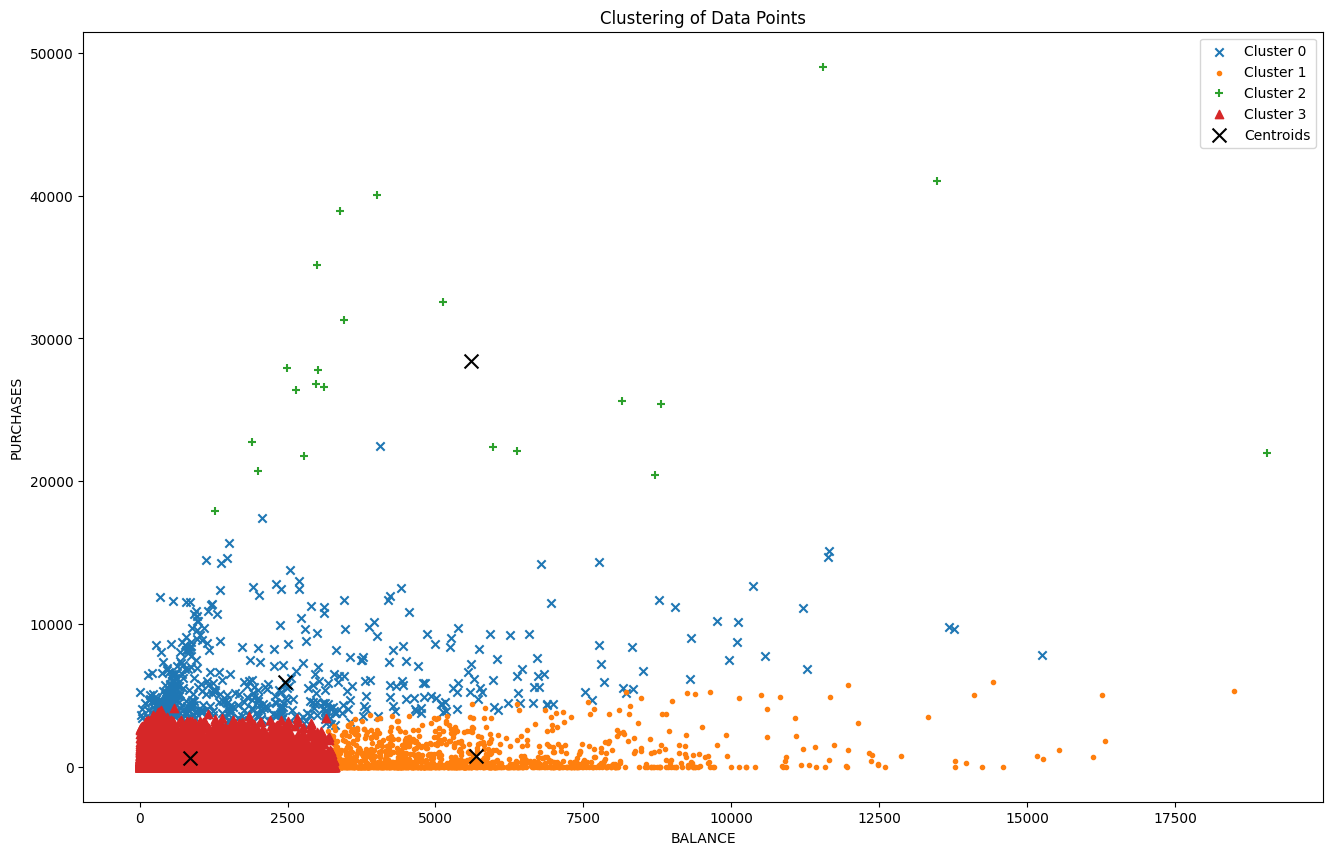

In [480]:
plt.figure(figsize=(16, 10))
markers = ['x', '.', '+','^']

for cluster in range(kmeans.n_clusters):
    cond = X['Cluster'] == cluster
    plt.scatter(X.loc[cond, 'BALANCE'], X.loc[cond, 'PURCHASES'], label='Cluster '+str(cluster), marker=markers[cluster])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=100, marker="x", label='Centroids')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Clustering of Data Points')
plt.legend()
plt.show()